# Time Series Clustering

Here, we load the silhouette widths for various cluster values, select the most appropriate cluster value per objective, and identify the scenarios with the worst clusters.



## 0. Imports

In [1]:
from dmdu.scenariodiscovery.clustering.silhouette_widths import *
from dmdu.general.visualization import *
import os

## 1. Load and plot Silhouette Widths

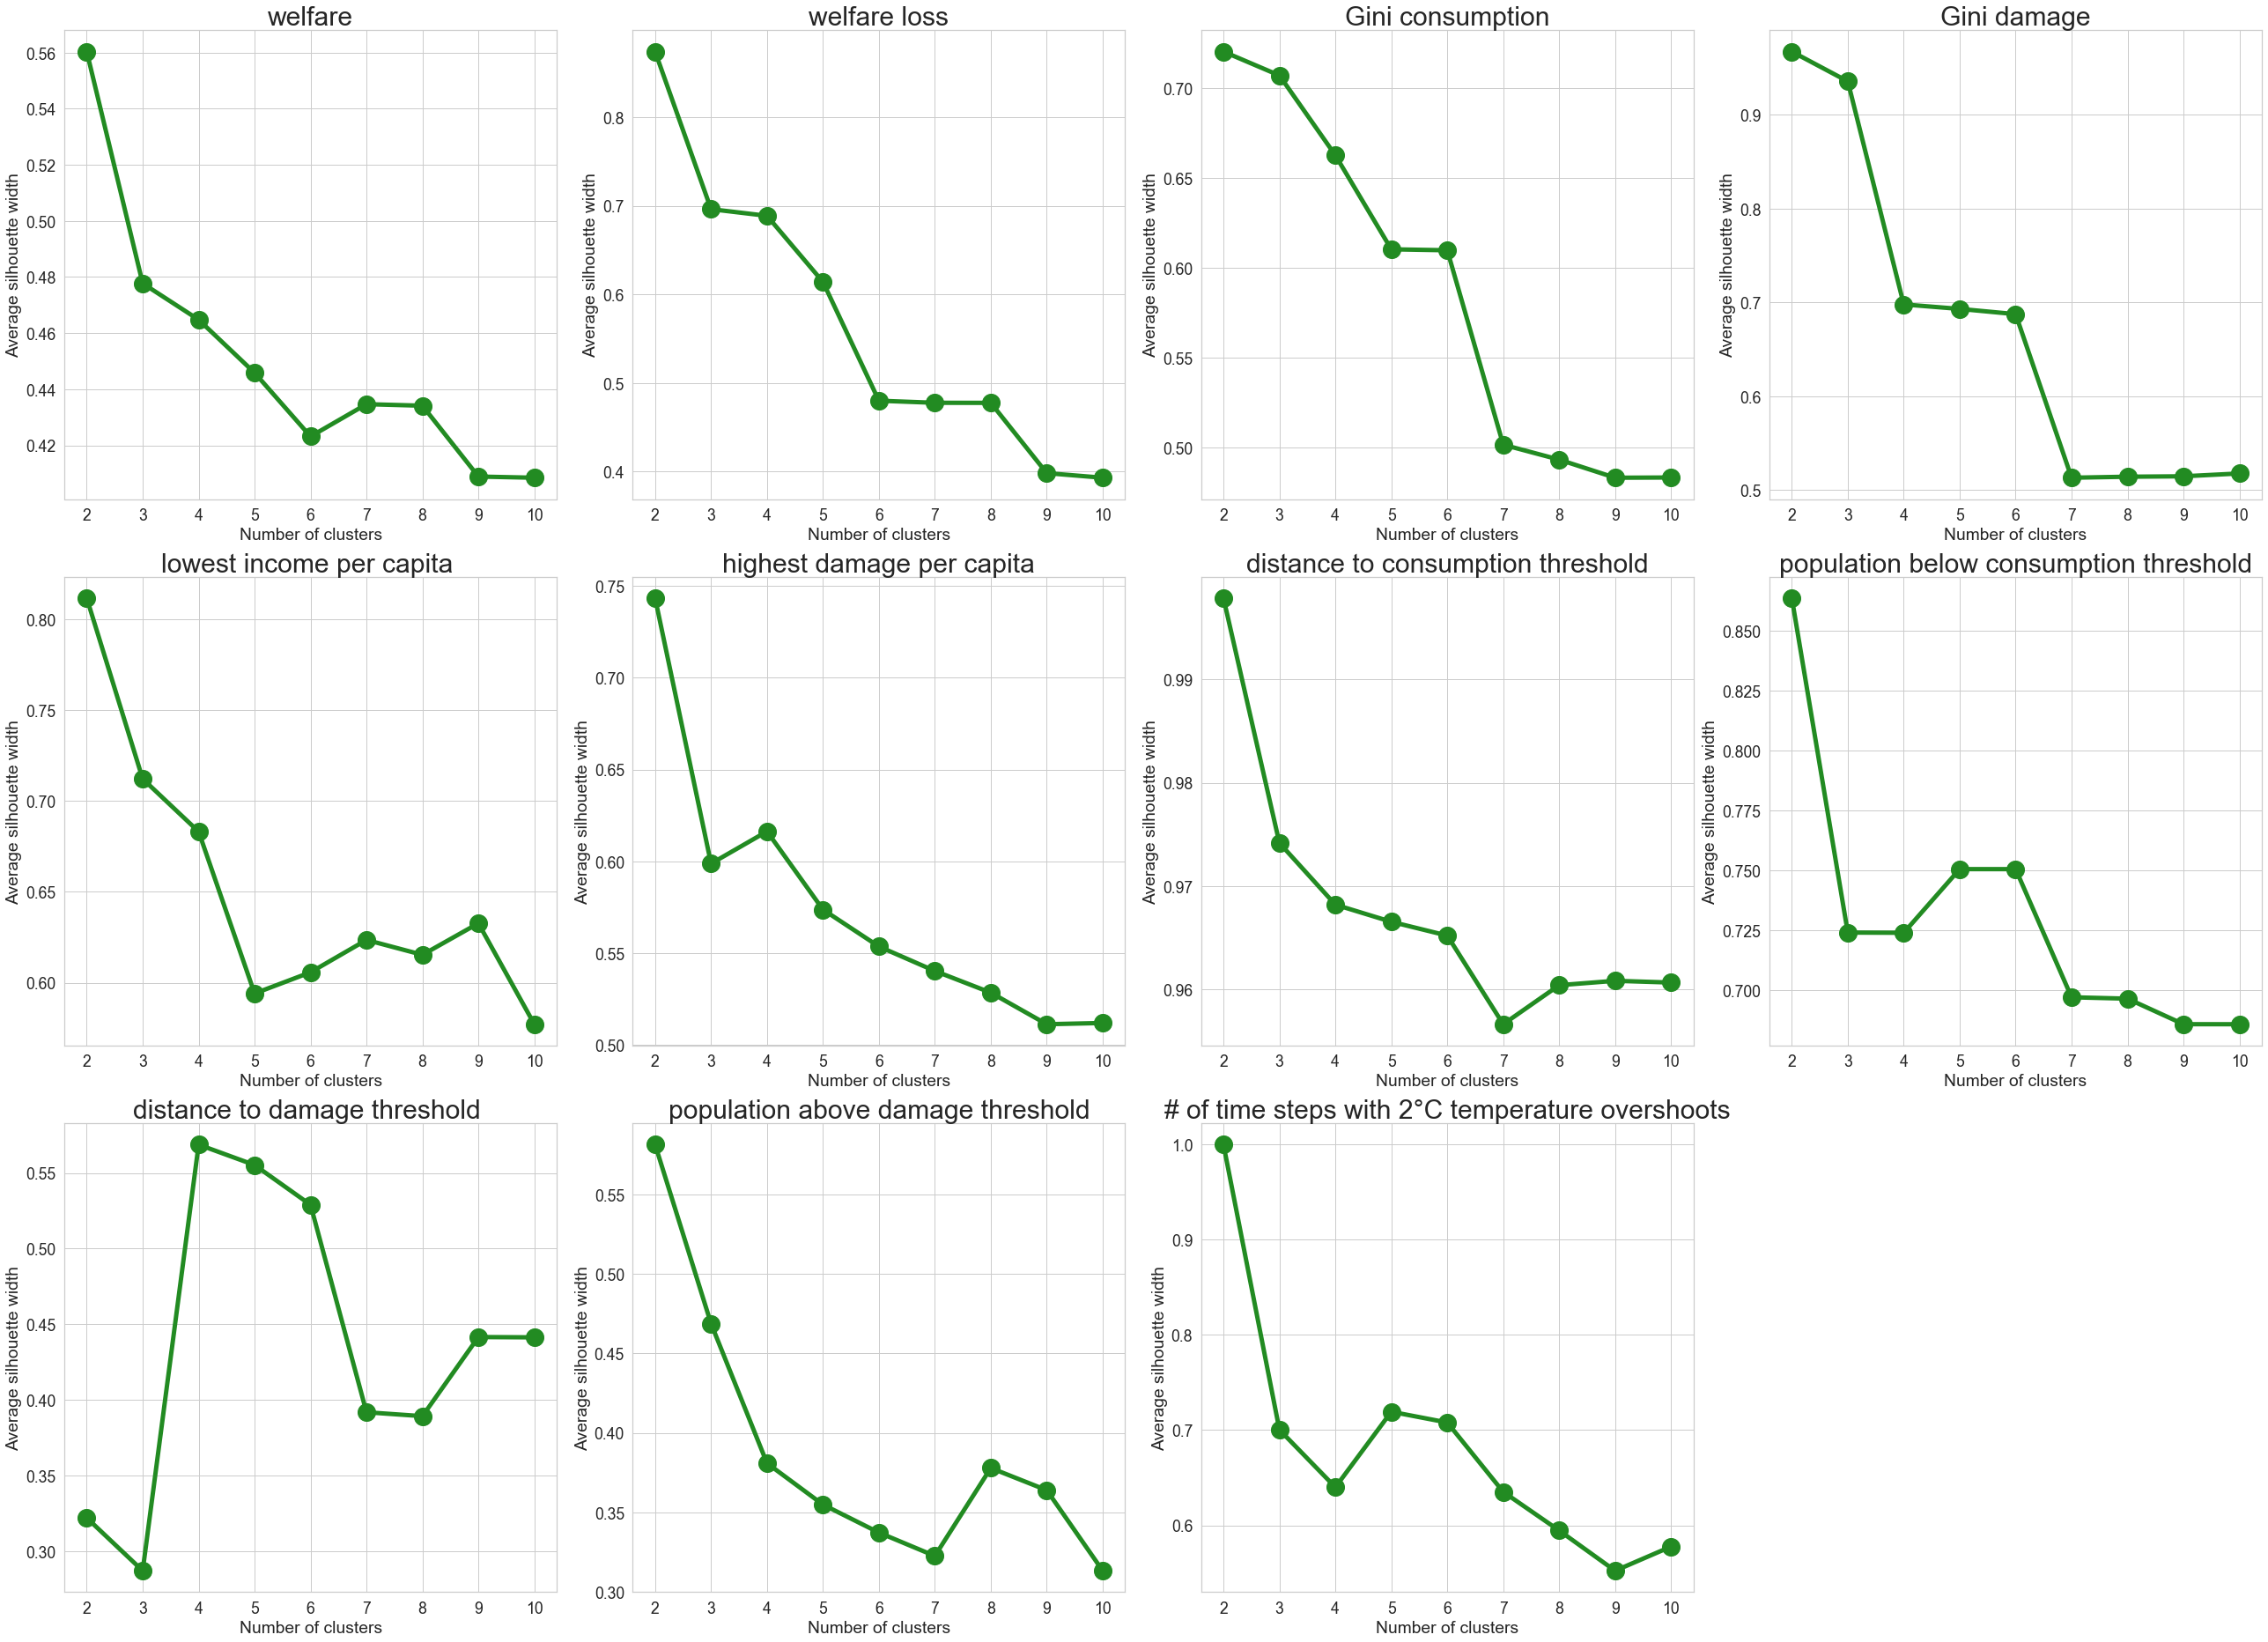

In [2]:
target_directory = os.path.join(
    os.getcwd(),
    'data'
)

n = 30000
file_name = f'silhouette_widths_{n}.csv'
path = os.path.join(
    target_directory,
    file_name
)
widths = pd.read_csv(path, index_col='Unnamed: 0')

plot_silhouette_widths(widths, saving=False)

#### Visual Inspection and Resulting cluster-number per objective

Given the figures above, we get the following cluster numbers per objective:


- 'welfare': 2-3,
- 'welfare loss': 2-4,
- 'Gini consumption': 2-4,
- 'Gini damage': 2-3,
- 'lowest income per capita': 2-4,
- 'highest damage per capita': 2-4,
- 'distance to consumption threshold': 2-3,
- 'population below consumption threshold': 2, 5, 6,
- 'distance to damage threshold': 4,5,6,
- 'population above damage threshold': 2-3,
- '# of time steps of 2°C temperature overshoots': 2, 3, 5, 6,


---

## 3. Loading outcomes from 30k run

In [3]:
target_directory = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'exploration',
    'data',
    'results_open_exploration_30000'
)

_, outcomes = load_results(file_name=target_directory)
outcomes = pd.DataFrame(outcomes)

## 4. Plotting clustered pathways


### 4.1 Utility

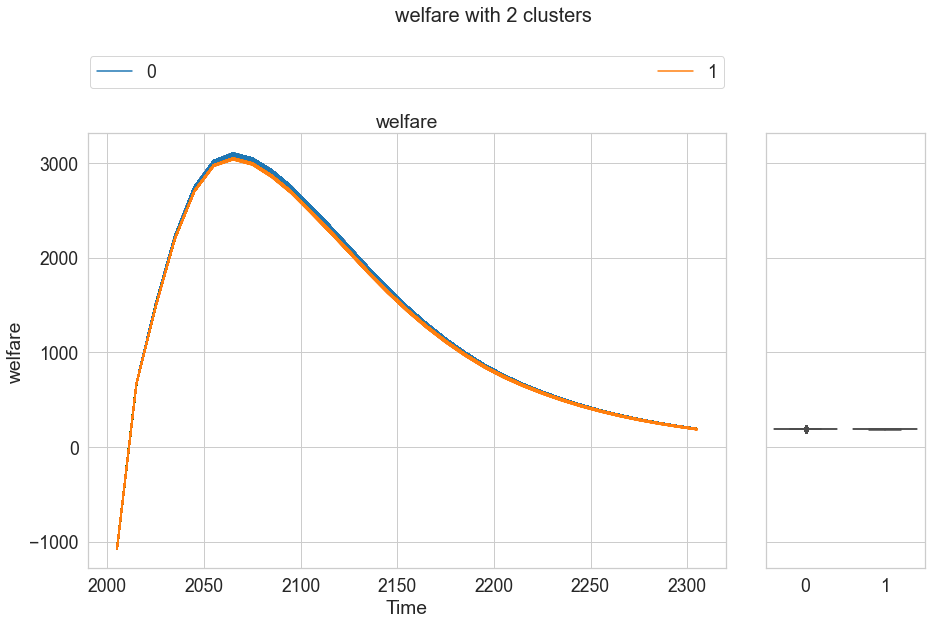

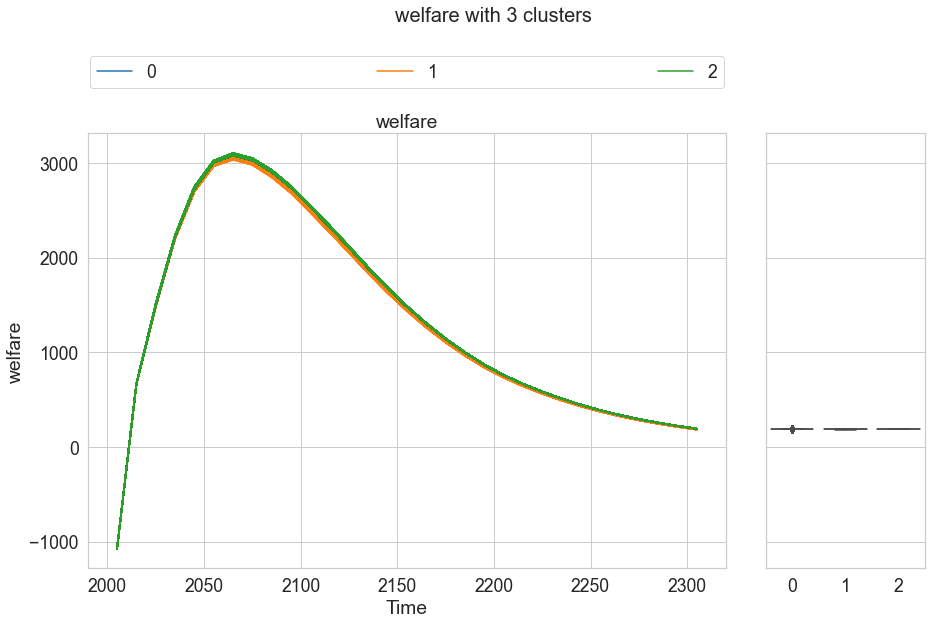

In [4]:
plot_clustered_pathways(outcomes, 'Utility', [2, 3])

Conclusions: Given that the pathways are almost identical, it doesn't seem to make sense to consider any of the clusters.

### 4.2 Disutility

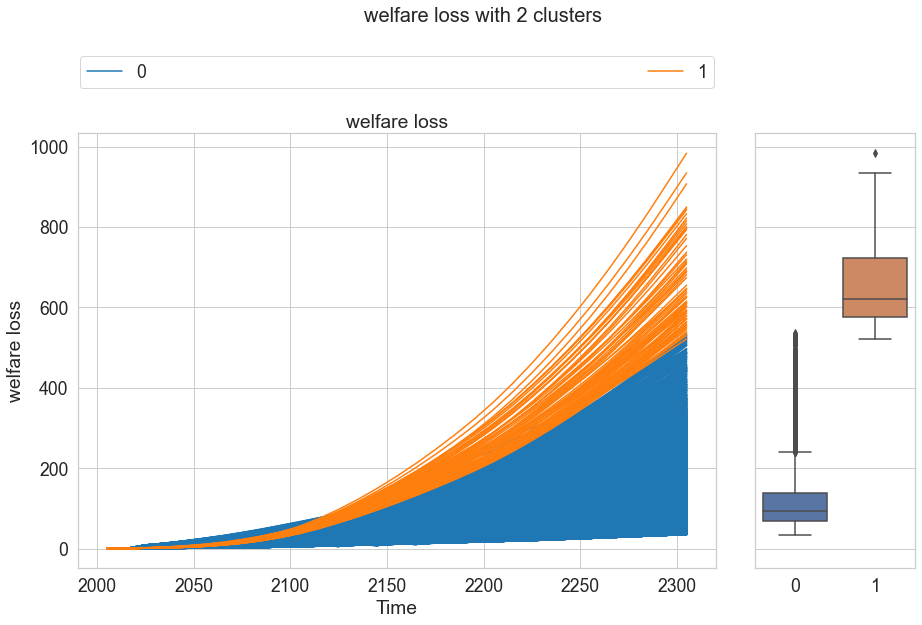

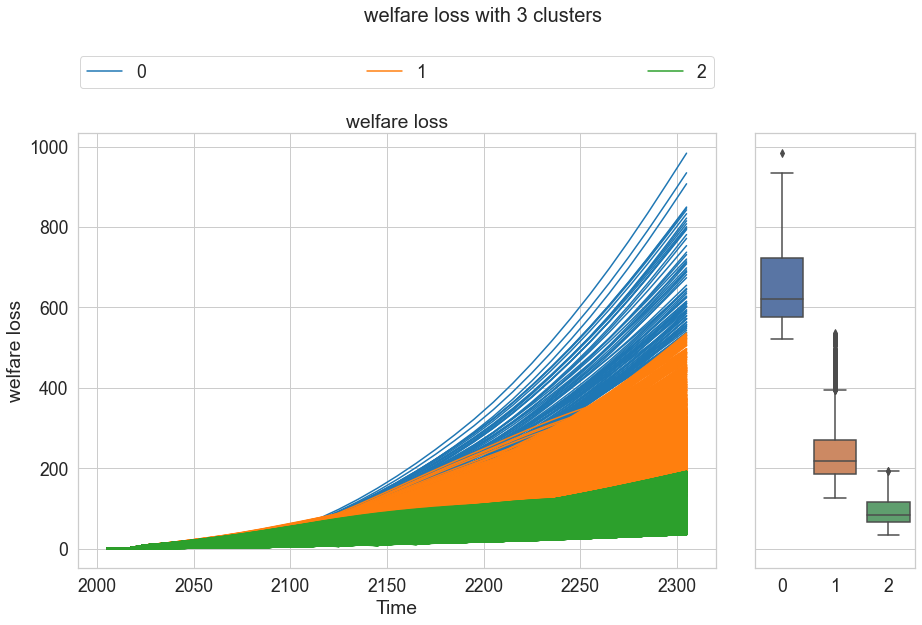

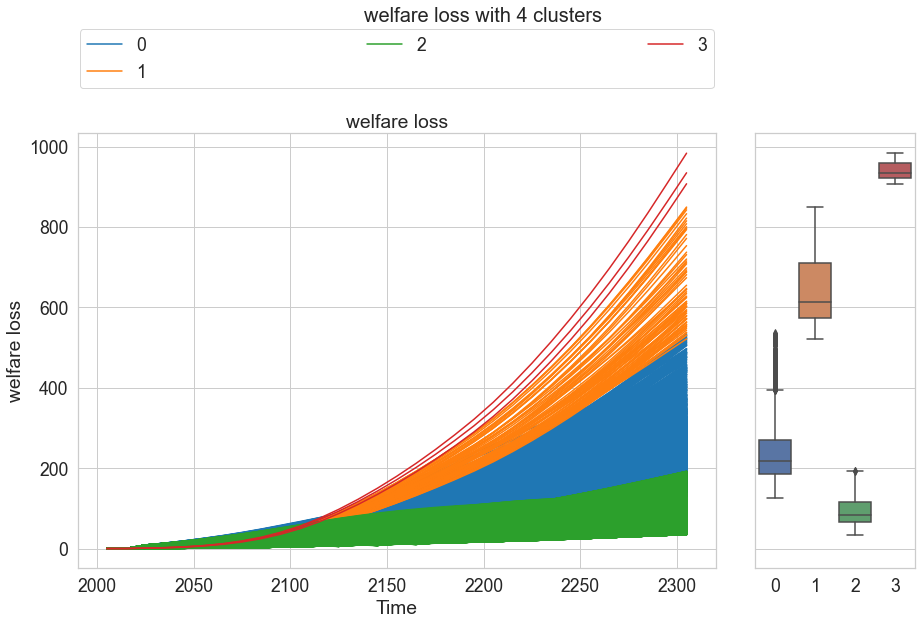

In [5]:
plot_clustered_pathways(outcomes, 'Disutility', [2, 3, 4])

Conclusions: Given that the 3-cluster version seems to capture a different separation thatn the 2-cluster version (not just exponential curves), but the 4-cluster version doesn't add much but splitting the highest cluster into two, we can take cluster 3.

### 4.3 Intratemporal consumption Gini

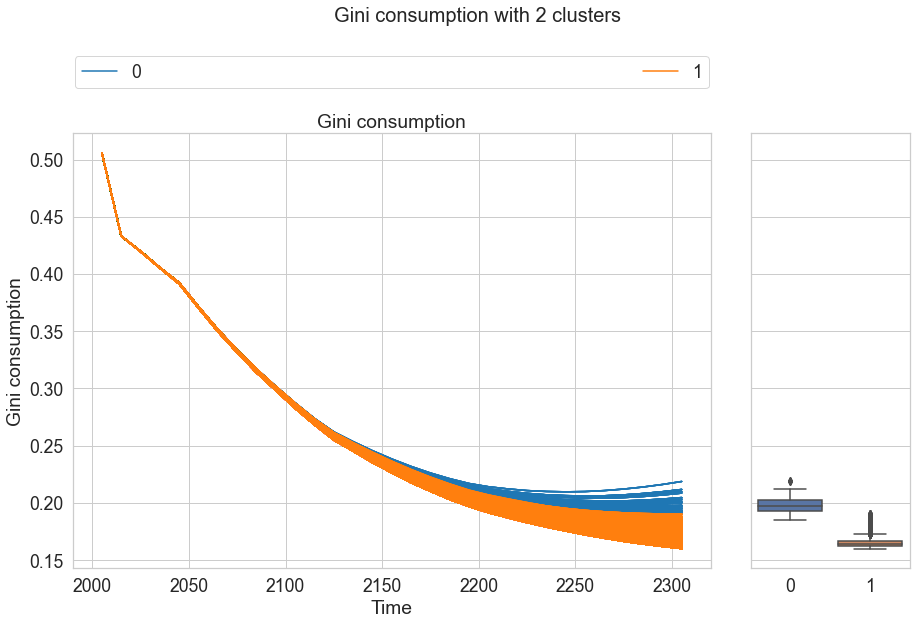

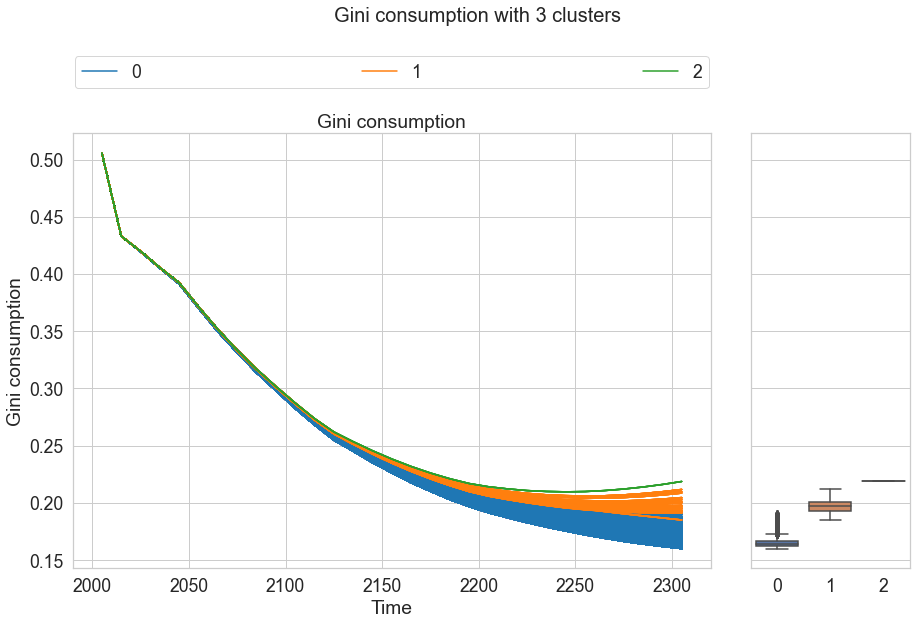

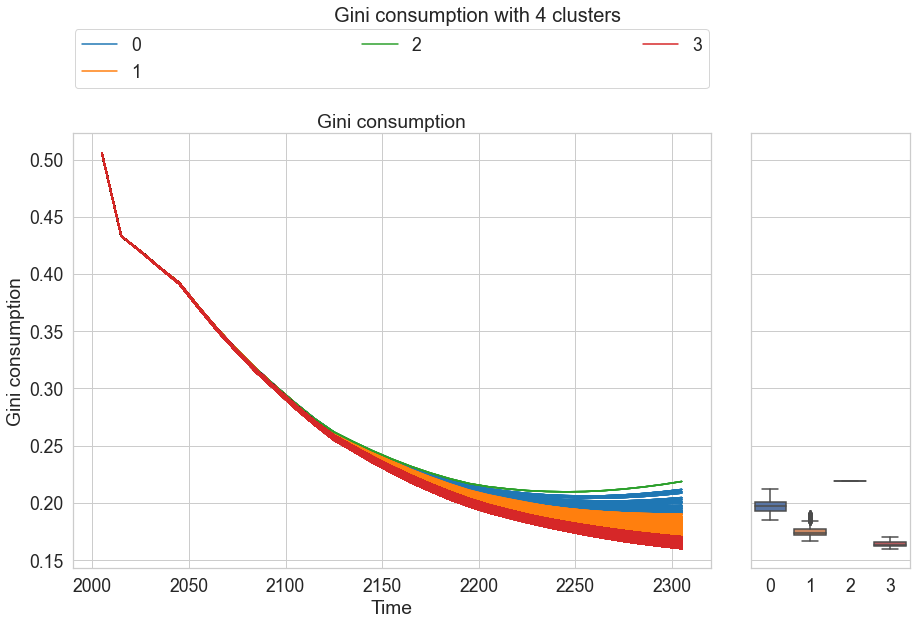

In [6]:
plot_clustered_pathways(outcomes, 'Intratemporal consumption Gini', [2, 3, 4])

Conclusions:

### 4.4 Intratemporal damage Gini

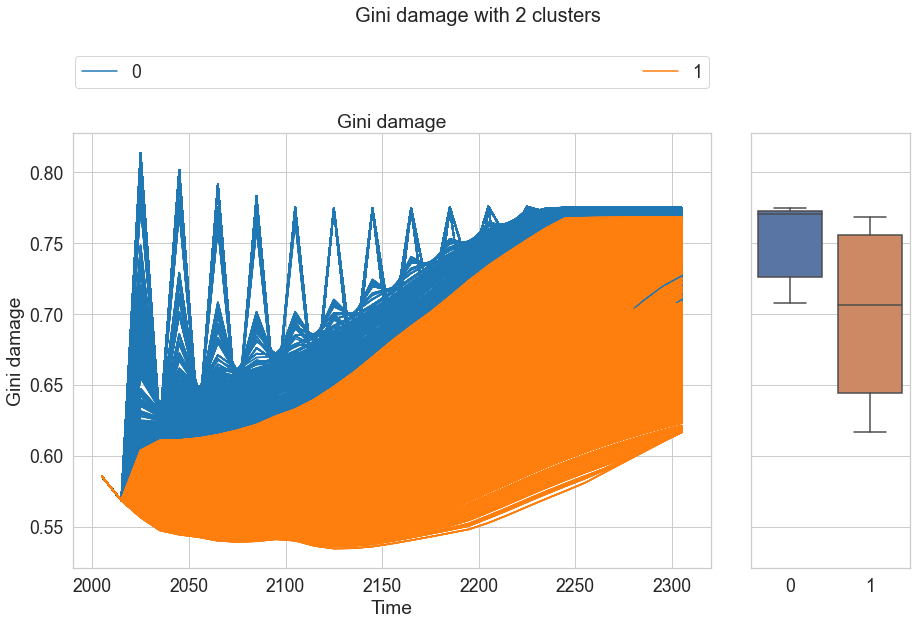

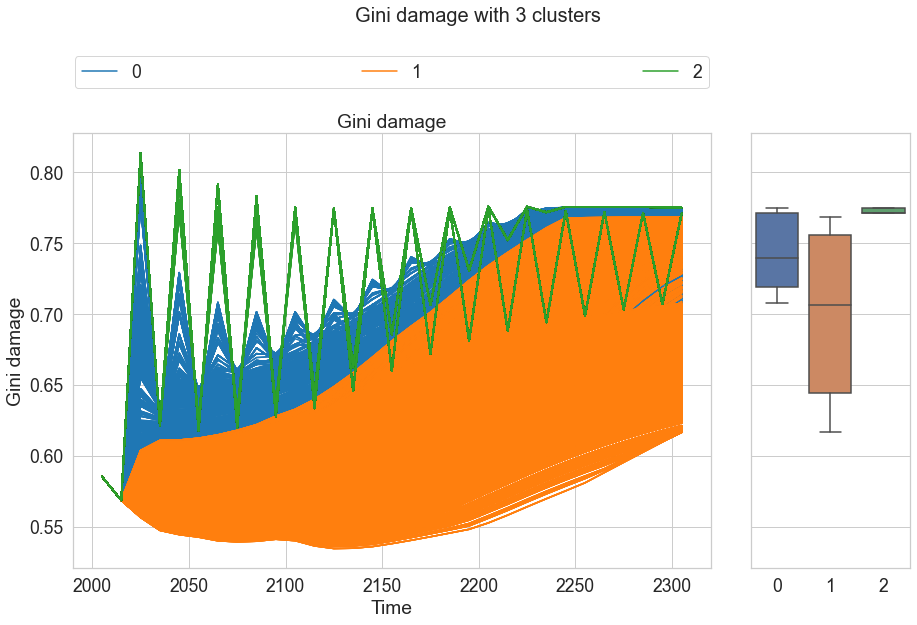

In [7]:
plot_clustered_pathways(outcomes, 'Intratemporal damage Gini', [2, 3])

Conclusions:

### 4.5 Lowest income per capita

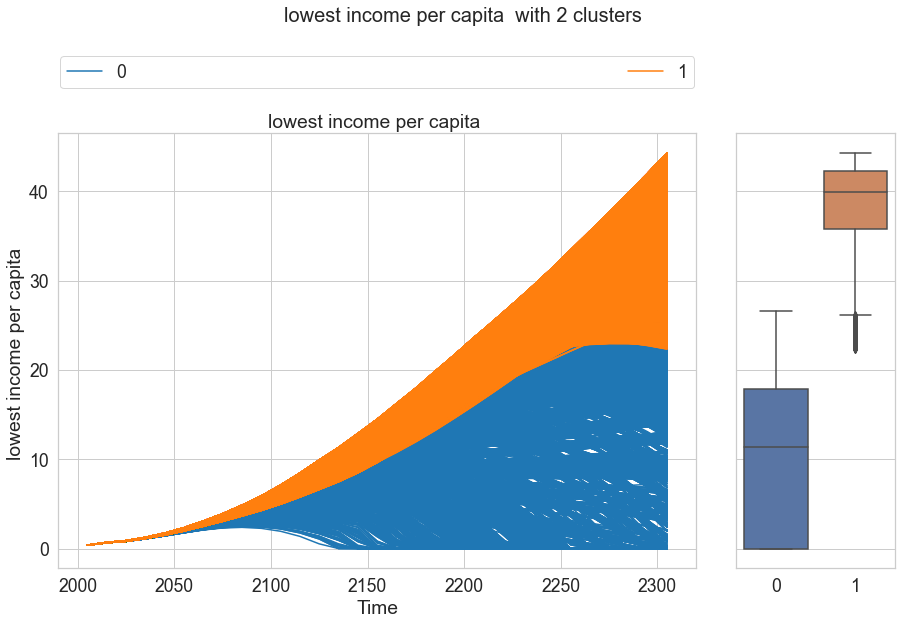

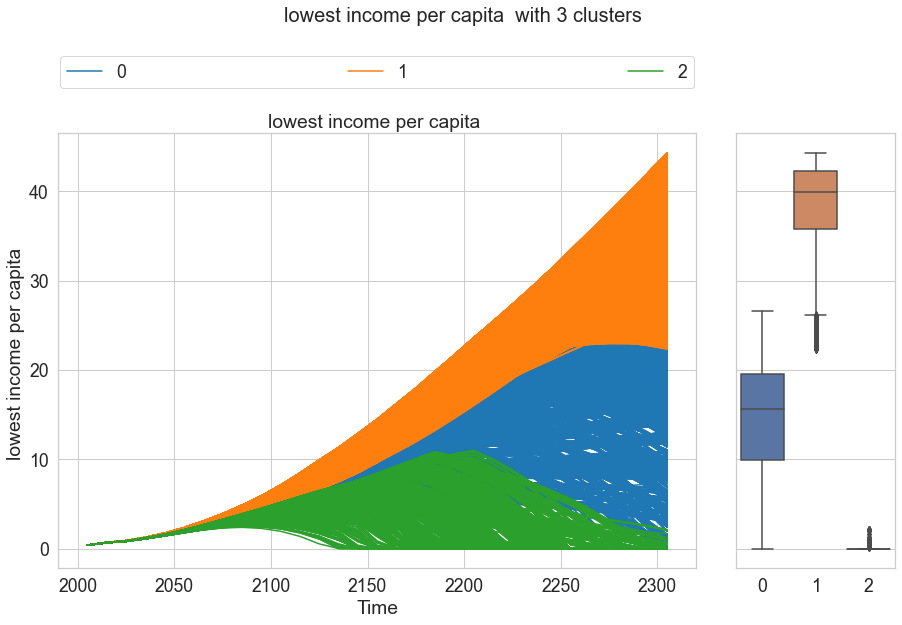

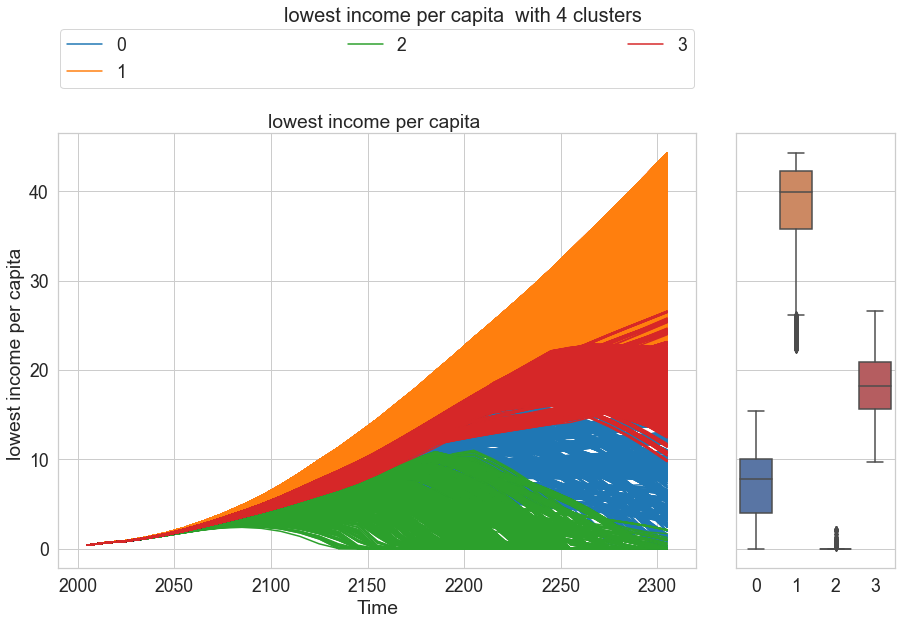

In [8]:
plot_clustered_pathways(outcomes, 'Lowest income per capita', [2, 3, 4])

Conclusions:

### 4.6 Highest damage per capita

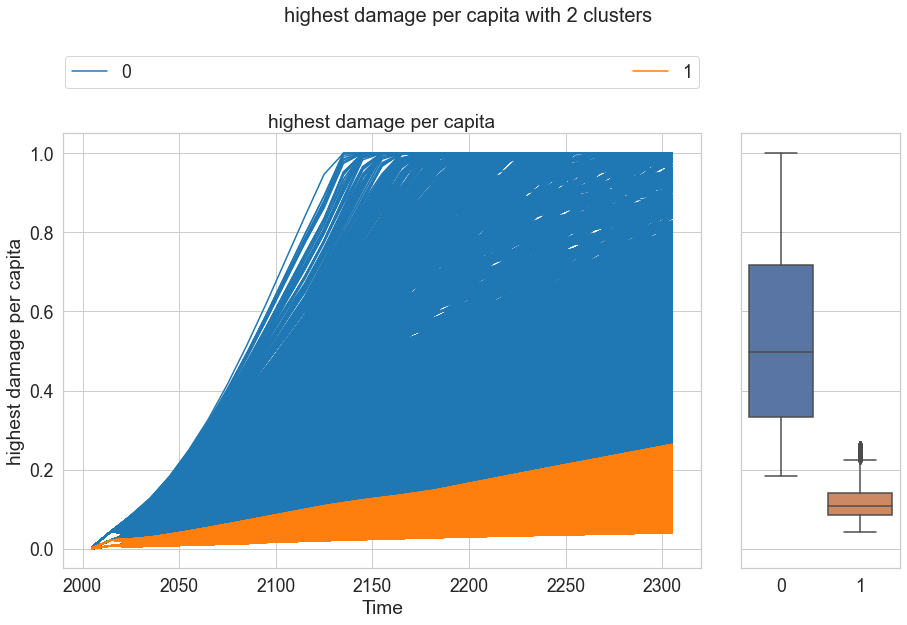

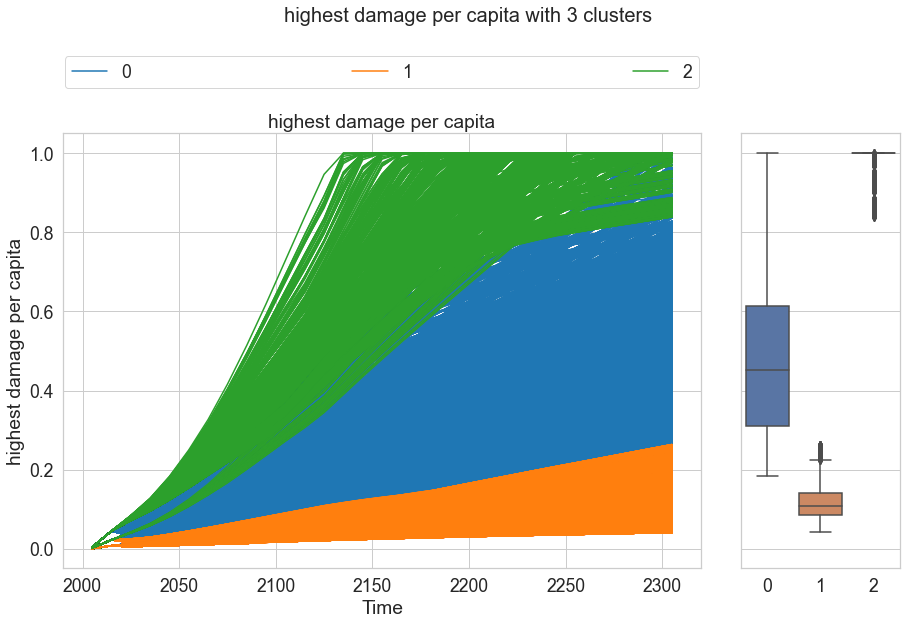

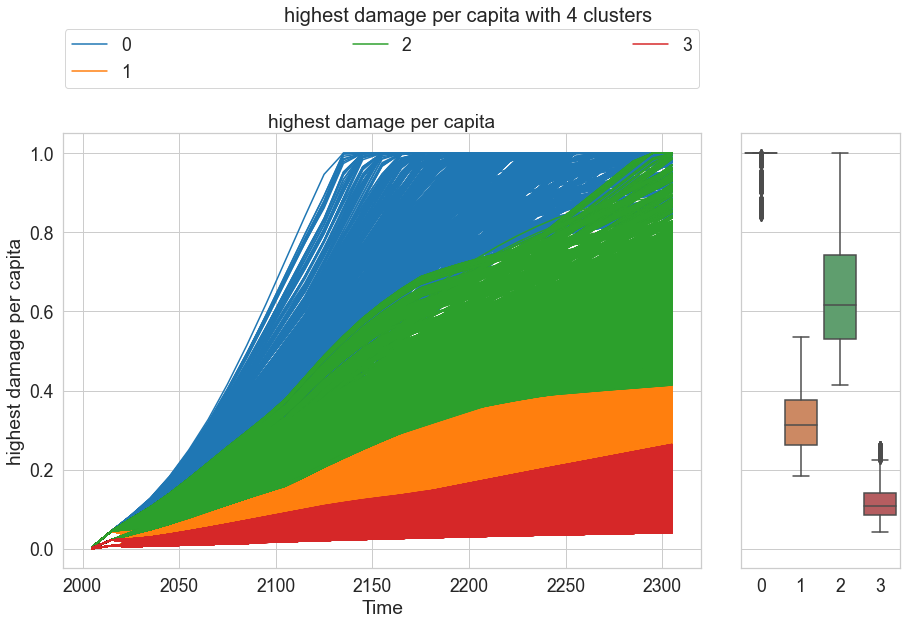

In [9]:
plot_clustered_pathways(outcomes, 'Highest damage per capita', [2, 3, 4])

Conclusions:

### 4.7 Distance to consumption threshold

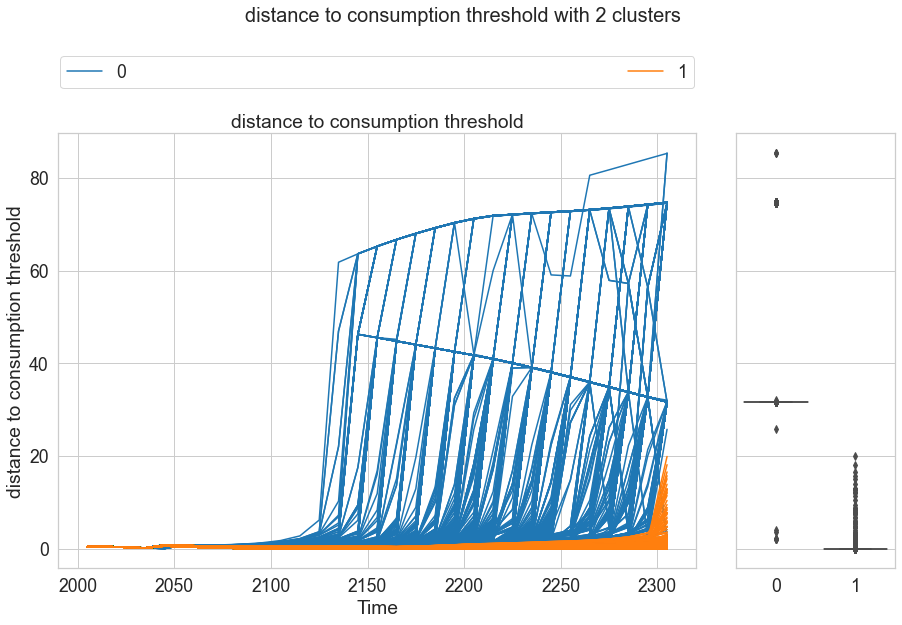

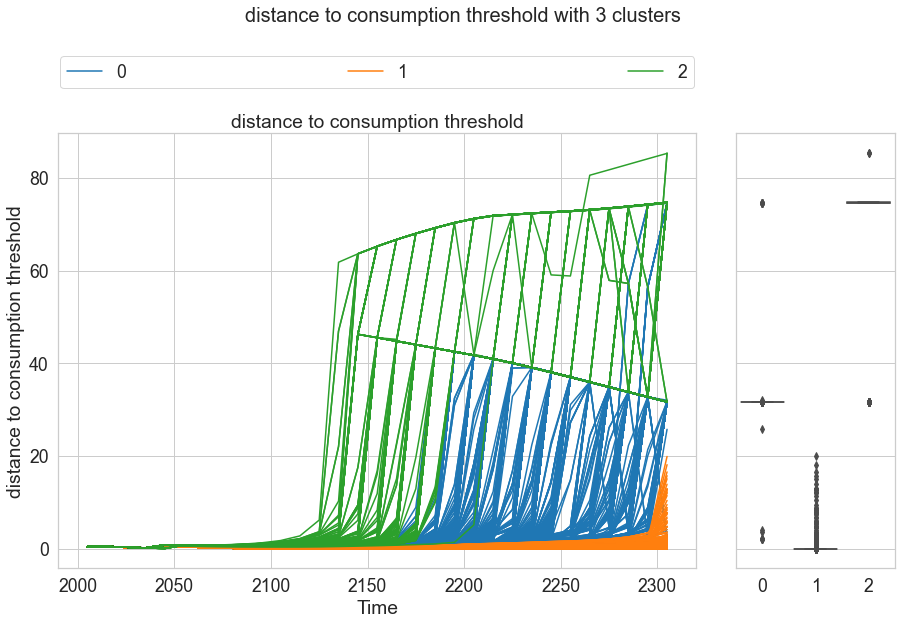

In [10]:
plot_clustered_pathways(outcomes, 'Distance to consumption threshold', [2, 3])

Conclusions:

### 4.8 Population below consumption threshold

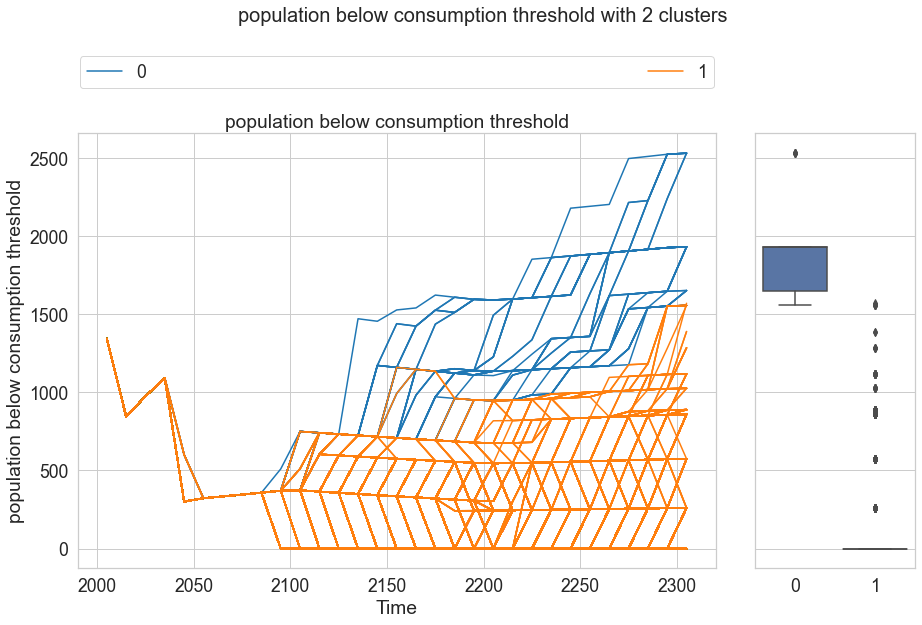

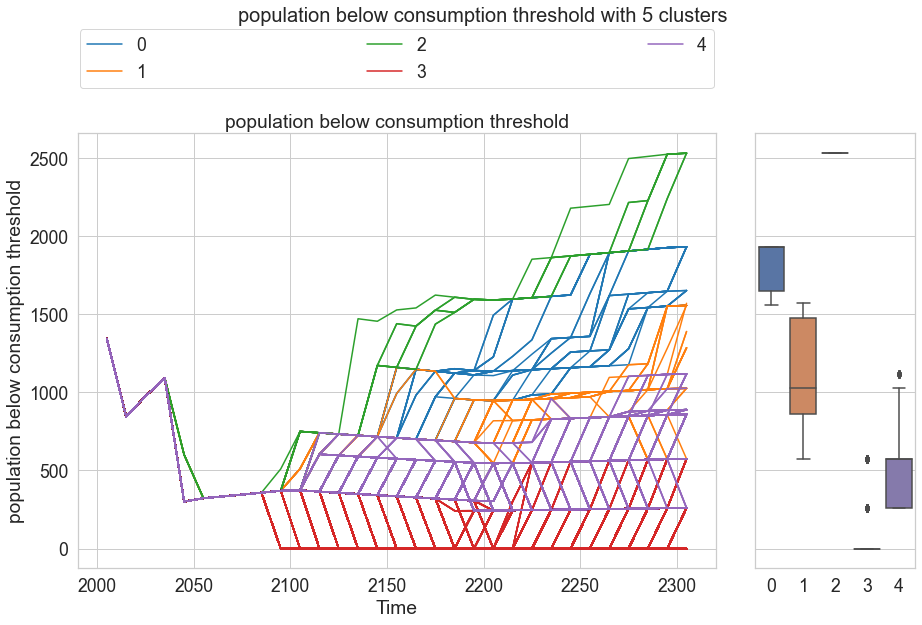

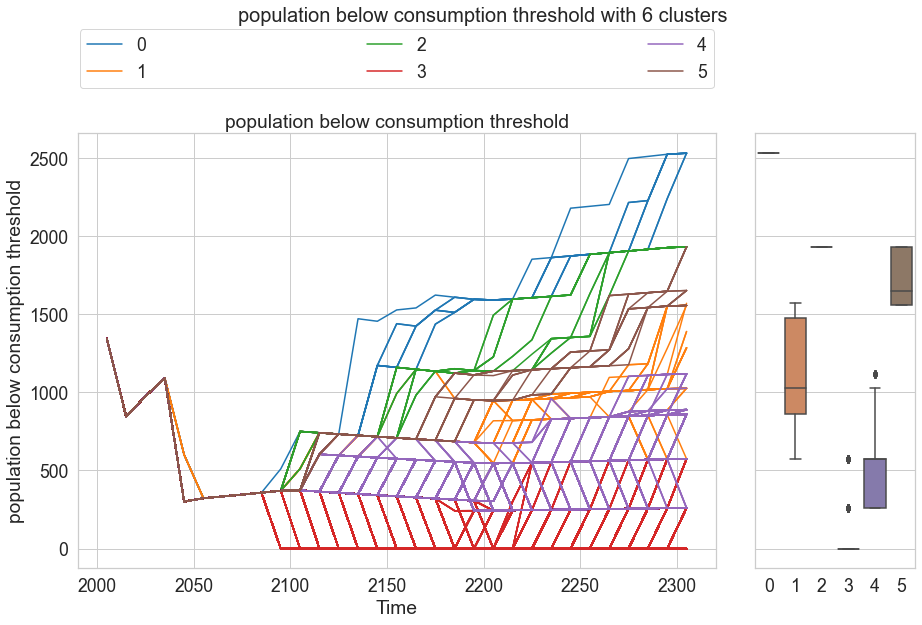

In [11]:
plot_clustered_pathways(outcomes, 'Population below consumption threshold', [2, 5, 6])

Conclusions:

### 4.9 Distance to damage threshold

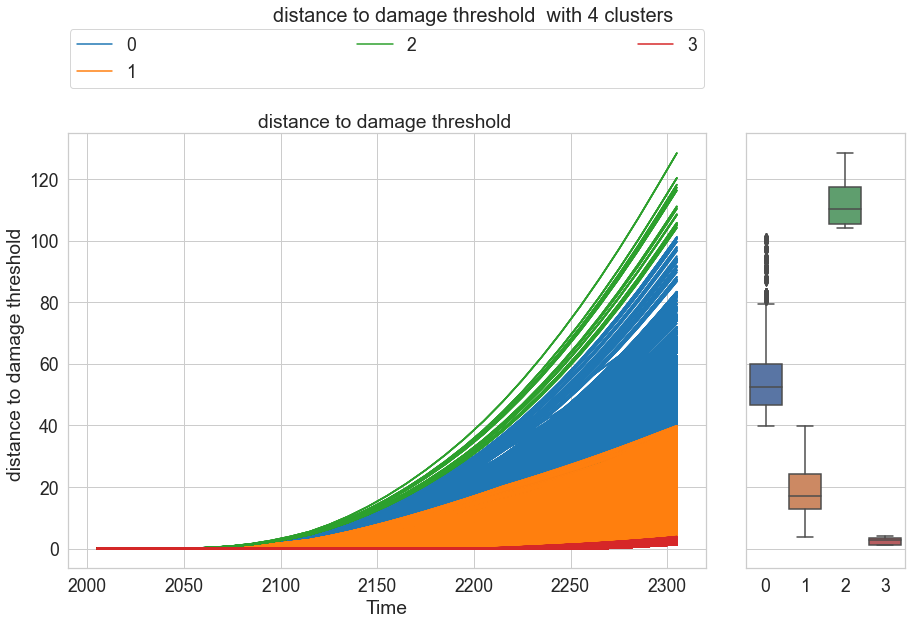

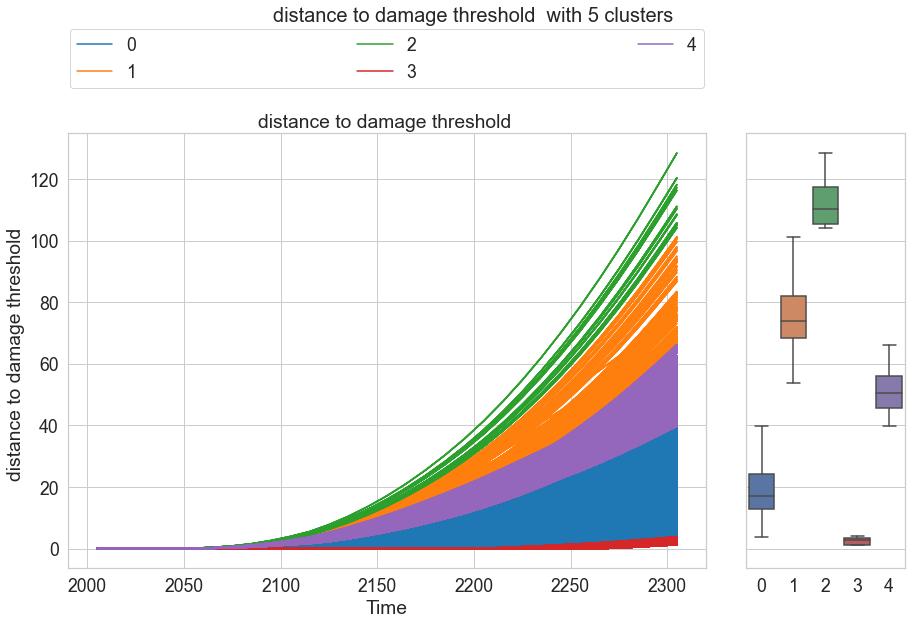

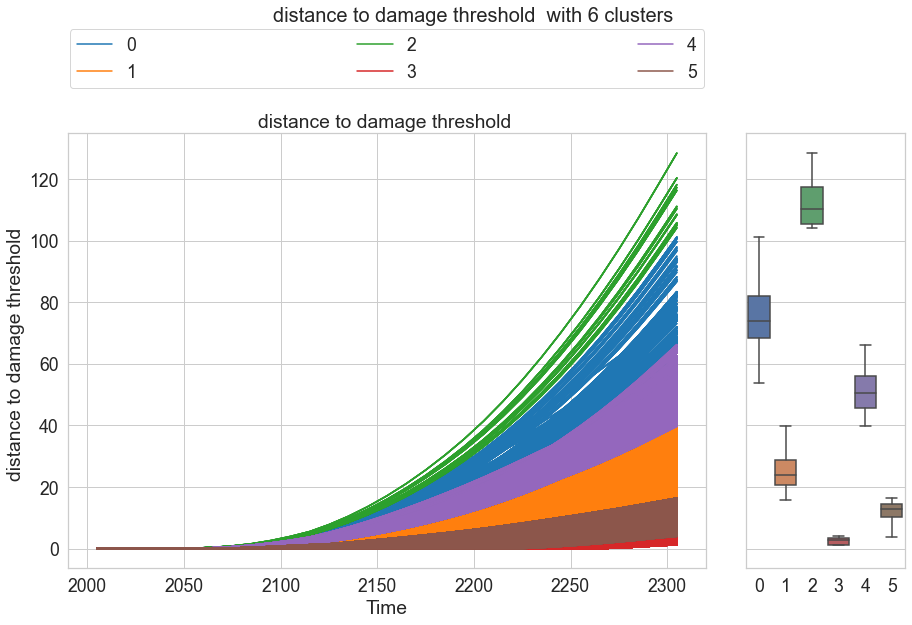

In [12]:
plot_clustered_pathways(outcomes, 'Distance to damage threshold', [4, 5, 6])

Conclusions:

### 4.10 Population above damage threshold

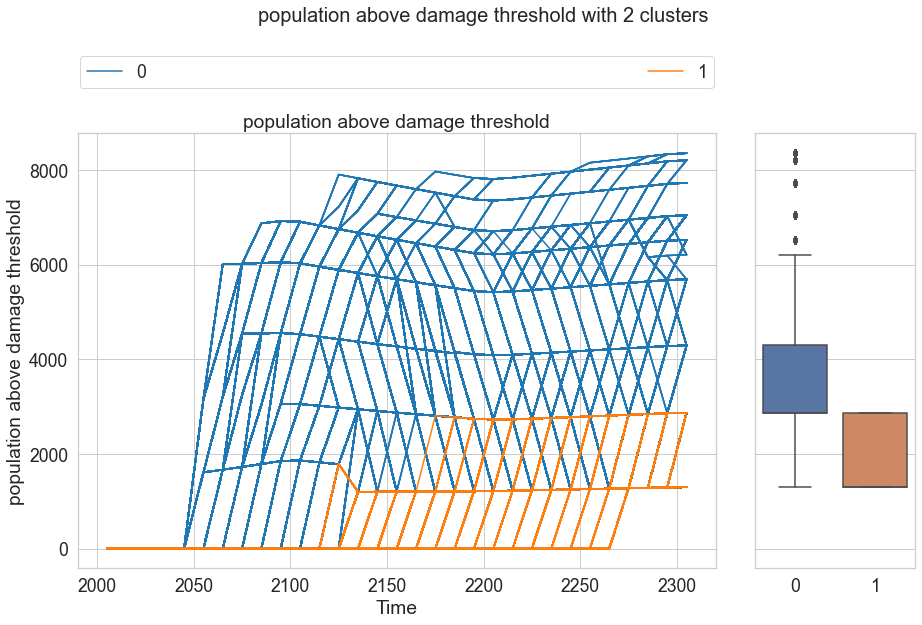

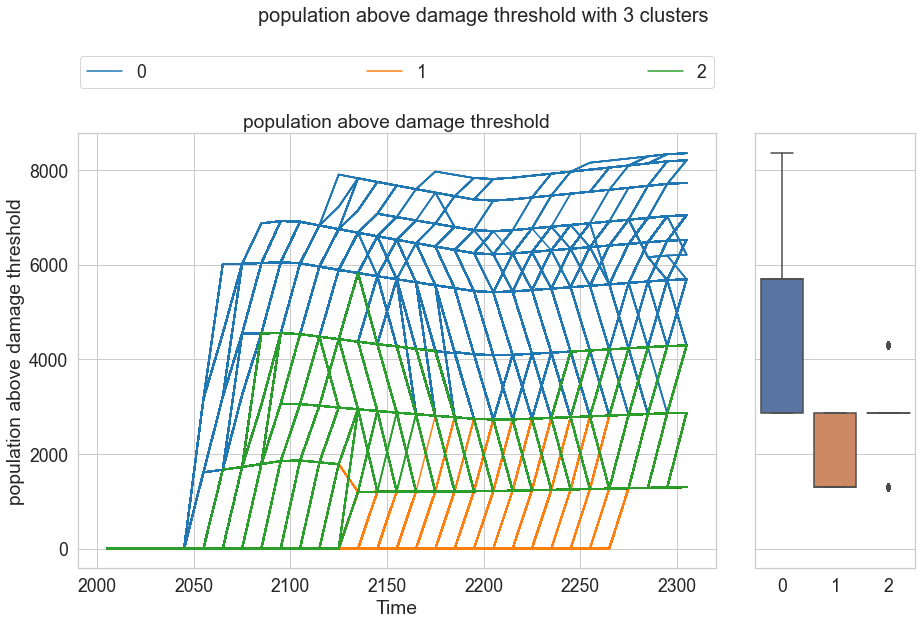

In [13]:
plot_clustered_pathways(outcomes, 'Population above damage threshold', [2, 3])

Conclusions:

### 4.11 Temperature overshoot

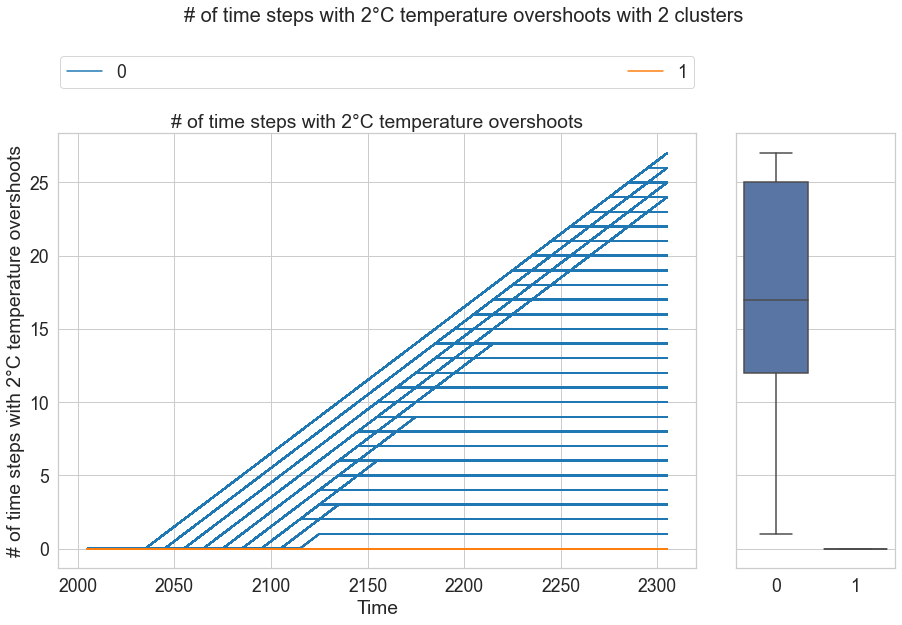

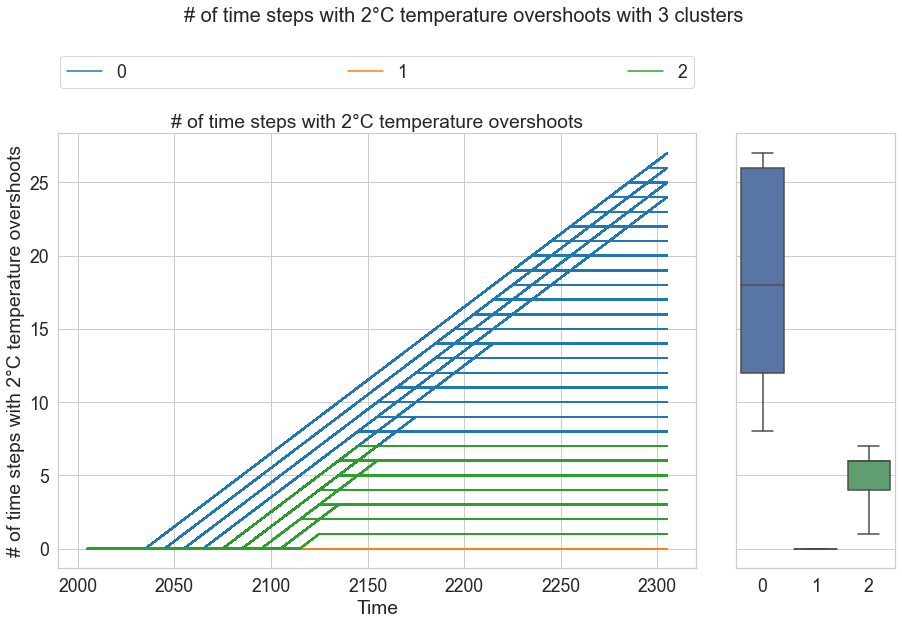

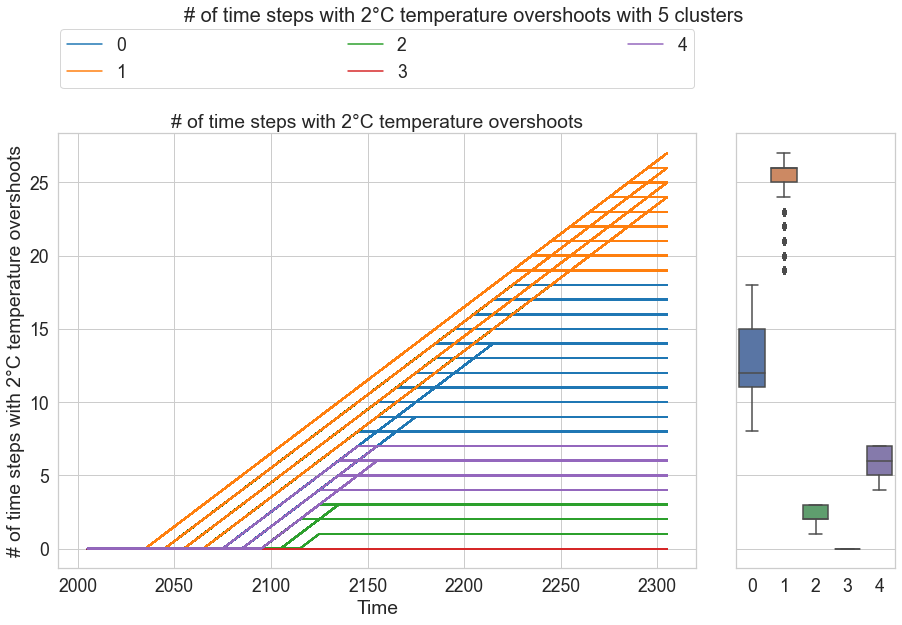

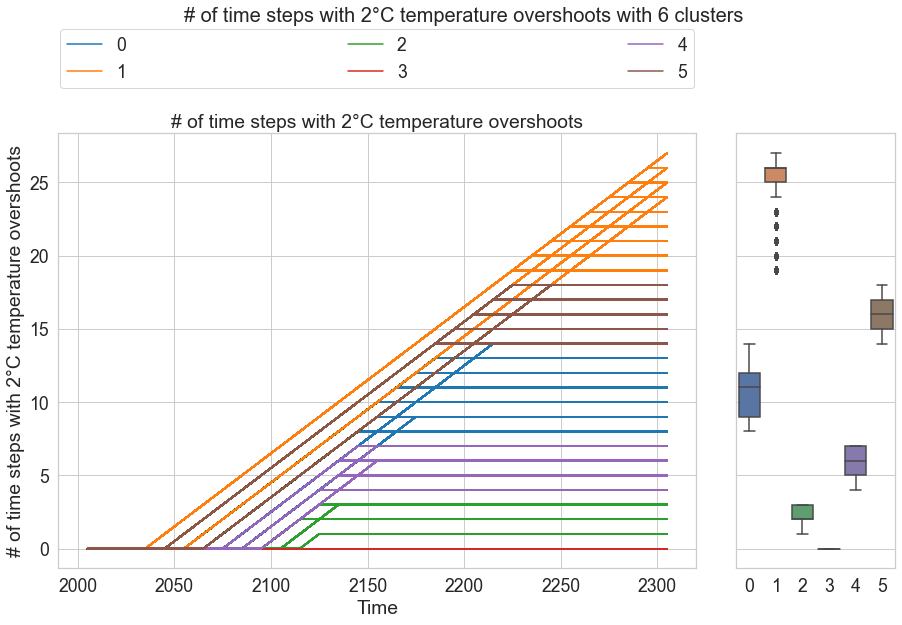

In [14]:
plot_clustered_pathways(outcomes, 'Temperature overshoot', [2, 3, 5, 6])

Conclusions:

## 5. Merge the worst scenarios across all objectives

Given the visual inspections above, we selected the following cluster numbers. The mapping below indicates the objective as a key, and the value is a tuple. This tuple consists of 1) how many clusters per objective are the most relevant, and 2) which of these clusters is the worst.

In [ ]:
mapping = {
    # 'Utility': (2, ScalarOutcome.MAXIMIZE),
    'Disutility': (3, 1),
    'Intratemporal consumption Gini': (3, 2),
    'Intratemporal damage Gini': (2, 0),
    'Lowest income per capita': (4, 2),
    'Highest damage per capita': (4, 1),
    'Distance to consumption threshold': (3, 2),
    'Population below consumption threshold': (5, 2),
    'Distance to damage threshold': (4, 2),
    'Population above damage threshold': (3, 0),
    'Temperature overshoot': (5, 1)
}

scenarios = merge_clustered_scenarios(mapping, saving=False)